# Cartier Jewelry Classification



### Importing the required libraries and dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cartier = pd.read_csv('./DataSets/cartier_catalog.csv')
cartier.head()

,ref,categorie,title,price,tags,description,image
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png
2,B4084800,rings,Love ring,1650.0,pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png
3,B4084700,rings,Love ring,1770.0,white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png
4,B4085000,rings,Love wedding band,1070.0,yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png


In [3]:
# Define tag_splitter // splits column  
def tag_spiliter(dataframe , col_name , delimiter , metal , first_gem , second_gem , third_gem , foruth_gem):
    dataframe['str_split'] = dataframe[col_name].str.split(delimiter)
    dataframe[metal] = dataframe.str_split.str.get(0).str.strip()
    dataframe[first_gem] = dataframe.str_split.str.get(1).str.strip()
    dataframe[second_gem] = dataframe.str_split.str.get(2).str.strip()
    dataframe[third_gem] = dataframe.str_split.str.get(3).str.strip()
    dataframe[foruth_gem] = dataframe.str_split.str.get(4).str.strip()
    dataframe.fillna(0 , inplace=True)
    del dataframe['str_split']

In [4]:
# Recall tag_splitter
tag_spiliter(cartier , 'tags' , ',' , 'metal' , 'gem' , 'second_gem' , 'third_gem' , 'foruth_gem')

*******************************
## A. Exploratory Data Analysis
Exploratory Data Analysis - does this for Machine Learning enthusiast. It is a way of visualizing, summarizing and interpreting the information that is hidden in rows and column format.

### 1. Which gem are mostly used in the products?

In [5]:
# Drop redundant columns
cartier.drop(['ref' , 'image' , 'tags' , 'title' , 'description'] , axis  = 1 , inplace=True)
gems = pd.concat([cartier["gem"],cartier["second_gem"],cartier["third_gem"],cartier["foruth_gem"]], axis= 0)
gems_values = gems.value_counts()[1:].to_frame()
gems_values.reset_index(inplace=True)
gems_values.columns = ['gem_type' , 'count']

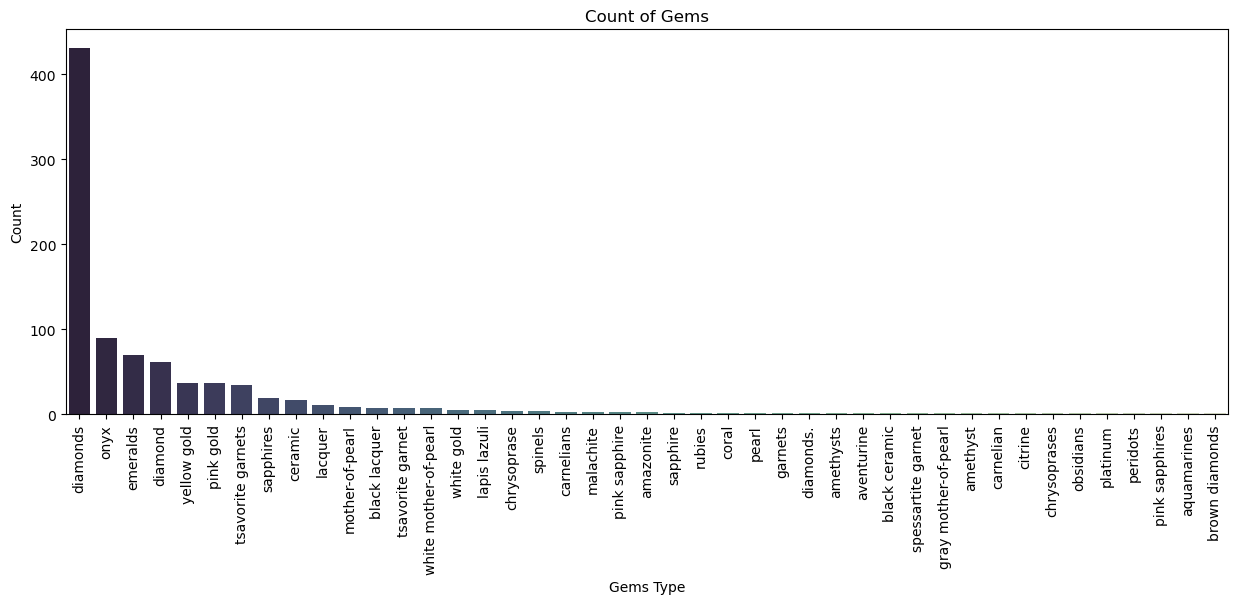

In [6]:
plt.figure(figsize=(15, 5))
sns.barplot(x= 'gem_type', y= "count", data= gems_values,
            palette= sns.cubehelix_palette(len(gems_values.gem_type), start=.5, rot=-.75, reverse= True))
plt.xlabel("Gems Type")
plt.ylabel("Count")
plt.title("Count of Gems")
plt.xticks(rotation= 90)
plt.show()

**Observation :** 
A glance at the above figure reveals to us that diamonds in all products are the most used gem, about **66 percent** of the product have diamonds in them, more than any other gems, Its most popular gem. onyx and emeralds are into the next ranks. 

In [7]:
# Dictionary for costum color palette 
color_dict = {'yellow gold': "#fcc72d", 
              'platinum': "#e5e4e2", 
              'pink gold': "#e9cdd0", 
              'white gold': "#f9f3d1", 
              'non-rhodiumized white gold': "#C0C0C0"}

### 2. Which metal mostly used in Cartier Jewellery?

In [8]:
cartier_category_metal = cartier.groupby('categorie')['metal'].value_counts().to_frame()
cartier_category_metal.columns = ['count']
cartier_category_metal.reset_index(level = [0 , 1] , inplace=True)

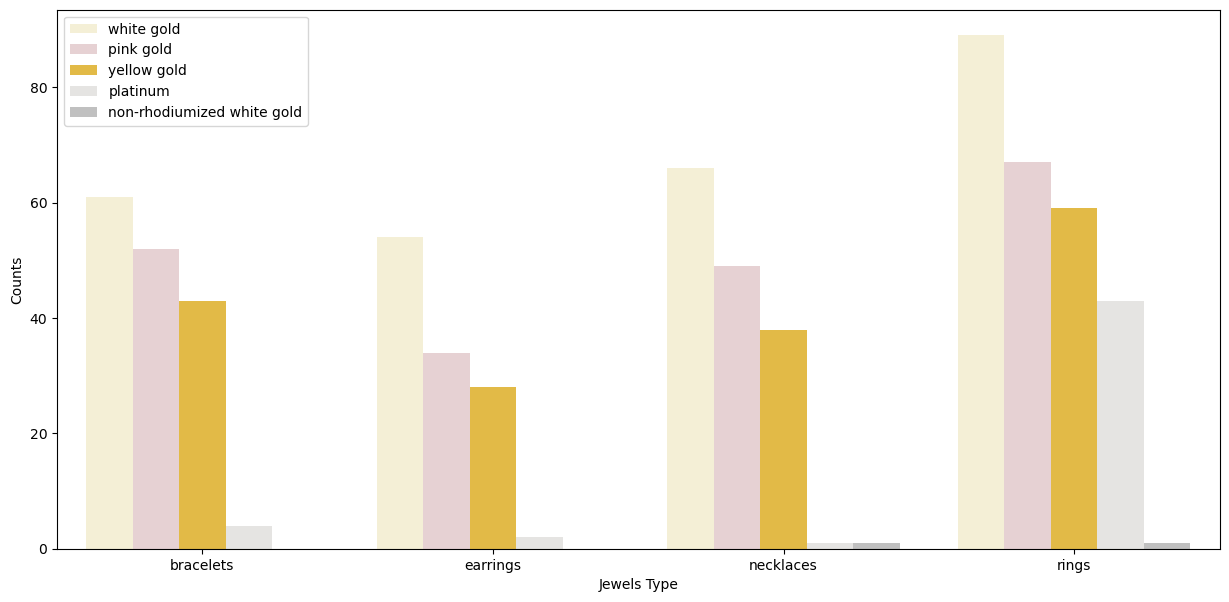

In [9]:
plt.figure(figsize=(15, 7))
sns.barplot(x= "categorie", y= "count", hue= "metal", data= cartier_category_metal, 
            palette= color_dict)
plt.xlabel("Jewels Type")
plt.ylabel("Counts")
plt.legend(loc= "upper left")
plt.show()

**Observation :** 
Jewels type include 4 category: **rings, earring, necklaces and bracelets** \
Ranks of metals in every category are the same and equal: 1.White Gold 2.Pink Gold 3.Yellow Gold 4.Platinum 5.Non-Rhodiumized White Gold

### 3. How much is the mean of Cartier jewellery as metal type?

In [10]:
cartier_gp1 = cartier.groupby(["categorie", "metal"])["price"].mean().round(2).to_frame()
cartier_gp1 = cartier_gp1.reset_index()

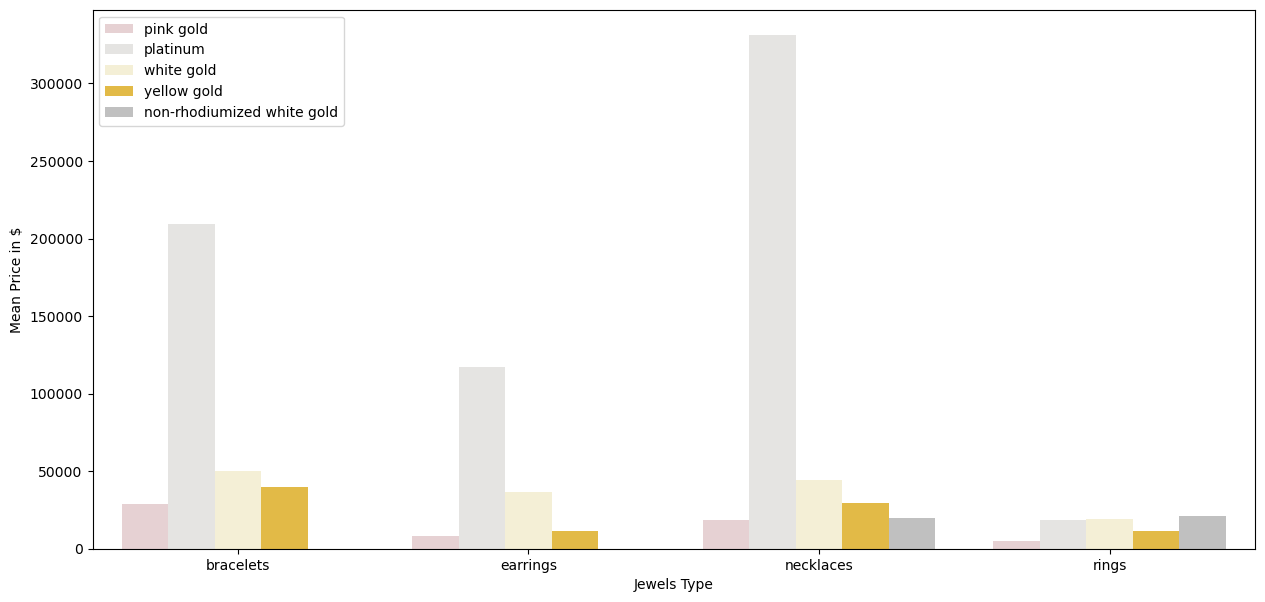

In [11]:
plt.figure(figsize=(15, 7))
sns.barplot(x= 'categorie', y= 'price', hue= 'metal', data= cartier_gp1 , palette = color_dict)
plt.xlabel('Jewels Type')
plt.ylabel('Mean Price in $')
plt.legend(loc= "upper left")
plt.show()

**Observation :** In every category **Platinum** in most valuable metal with a huge difference in price as $. After that White Gold have a second place but other metals are close in price for every category

### 4. How much the mean price for every metal type in cartier jewels?

In [12]:
cartier_gp2 = cartier.groupby("metal")["price"].mean().round(2).to_frame()
cartier_gp2.reset_index(inplace=True)

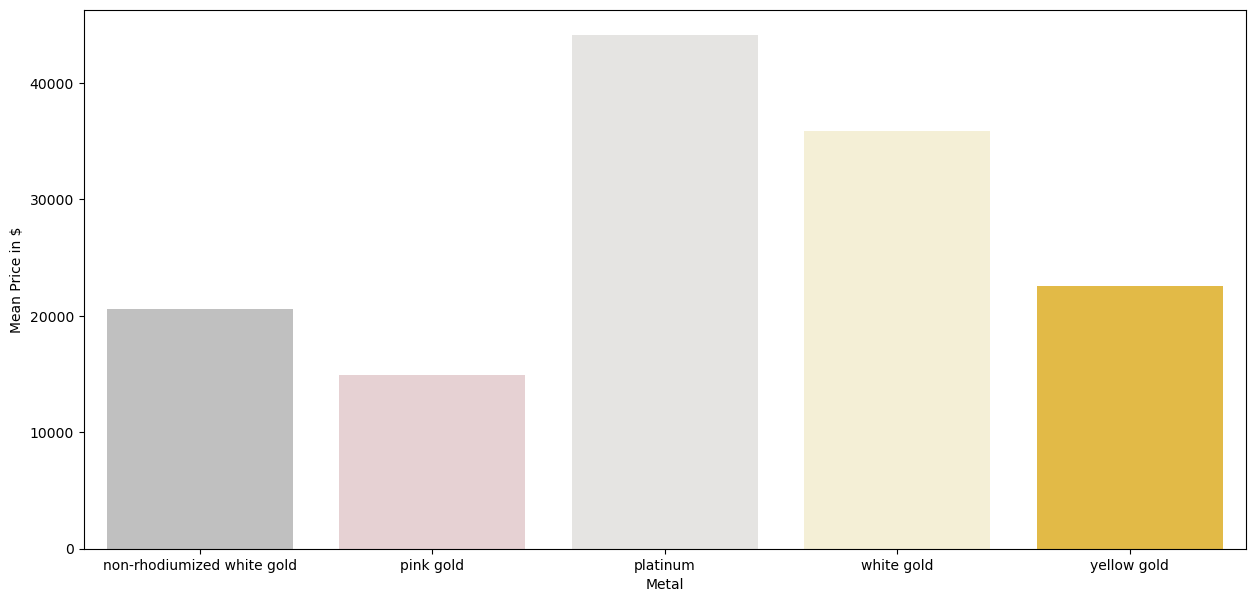

In [13]:
plt.figure(figsize=(15, 7))
sns.barplot(x= "metal" , y = 'price', data=cartier_gp2 , palette = color_dict)
plt.xlabel('Metal')
plt.ylabel('Mean Price in $')
plt.show()

**Observation :** As we saw earlier Platinium is the most valuable metal that the Cartier used in jewels. The mean price of Platinium jewels is more than **40000** Dollars after that white metal is second. "Yellow Gold" and "Non-Rhodiumized White Gold" are about equal in mean price, in last is pink gold with mean of **15000** Dollars that is about one of third of Platinium

### 5. How many gems in every jewels category?

In [14]:
cartier_gp_gem = cartier.groupby('categorie')['gem'].value_counts().to_frame()
cartier_gp_gem.columns = ['count']
cartier_gp_gem.reset_index(level = [0 , 1] , inplace=True)
cartier_gp_gem = cartier_gp_gem[cartier_gp_gem["gem"] != 0]

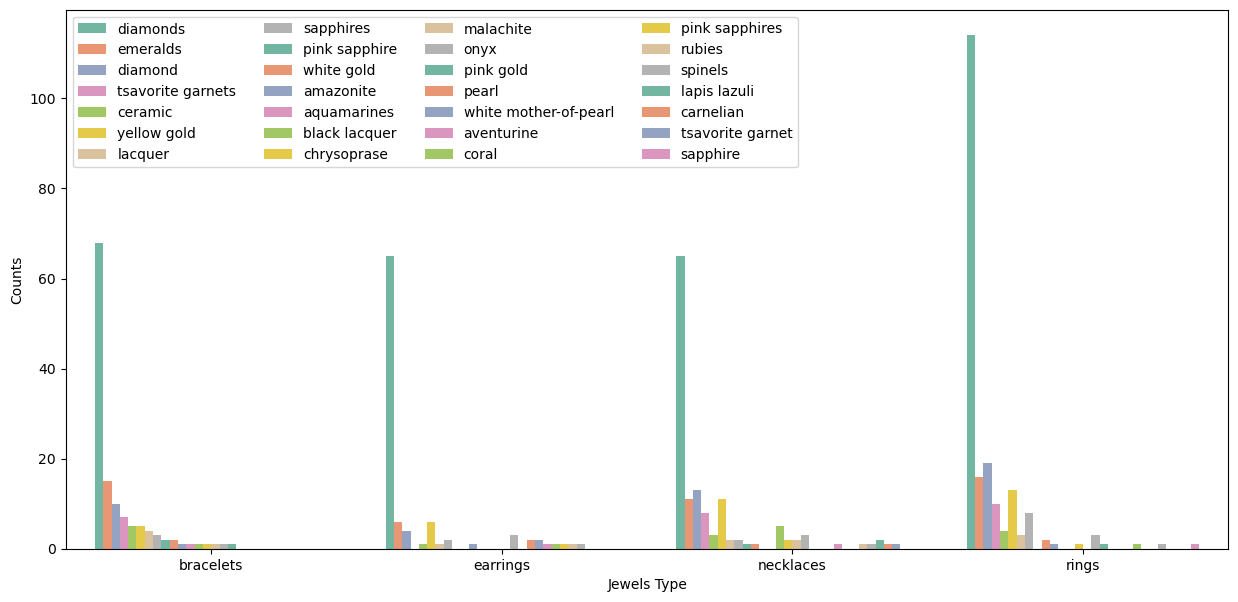

In [15]:
plt.figure(figsize=(15, 7))
sns.barplot(x= 'categorie', y= 'count', hue= 'gem', data= cartier_gp_gem , palette = sns.color_palette("Set2"))
plt.xlabel('Jewels Type')
plt.ylabel('Counts')
plt.legend(ncol=4, loc= 'upper left')
plt.show()

**Observation :** 
In all categories, **diamond** is the most popular gem in the making of jewelry.  Exceedingly over 100 ring types include **diamonds**, in most cases more than one piece of **diamond**. This also rules for other categories of jewelry such as **earrings**, **necklaces**, and **bracelets**. Variety of the gems used in **rings** and **bracelets** are more than **earrings** and **necklaces**. Furthermore, **Sapphires** are also a popular gem used in **ring** production.

### 6. How much the gem price in every jewels category?

In [16]:
cartier_gp1_gem = cartier.groupby(["categorie", "gem"])["price"].mean().round(2).to_frame()
cartier_gp1_gem = cartier_gp1_gem.reset_index()
cartier_gp1_gem = cartier_gp1_gem[cartier_gp1_gem["gem"] != 0]

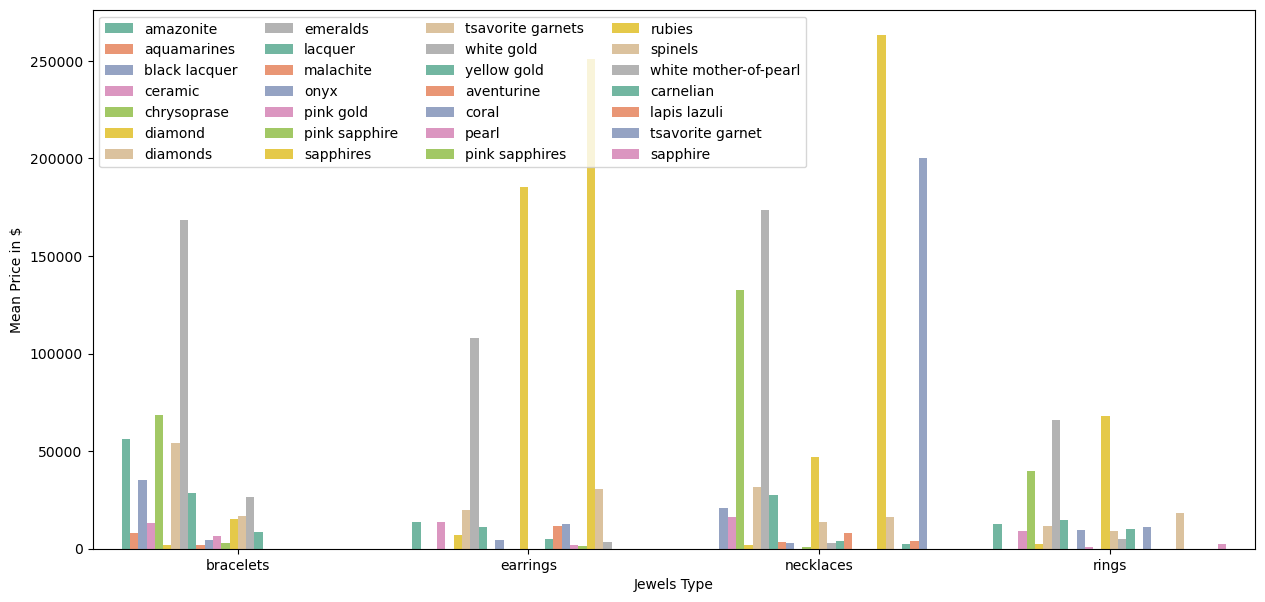

In [17]:
plt.figure(figsize=(15, 7))
sns.barplot(x= 'categorie', y= 'price', hue= 'gem', data= cartier_gp1_gem , palette = sns.color_palette("Set2"))
plt.xlabel('Jewels Type')
plt.ylabel('Mean Price in $')
plt.legend(ncol=4, loc= 'upper left')
plt.show()

**Observation :** Earrings, Necklaces, and Rings with Rubies(gem) has a huge difference in the price of jewelry, but Emeralds(gem) in Bracelets shows the is a key factor in price determination. A closer look at necklaces reveals us that Tsavorite garnet has third place in price.

### 7. Which gem is the most expensive?

In [18]:
cartier_gp2_gem = cartier.groupby("gem")["price"].mean().round(2).to_frame()
cartier_gp2_gem.reset_index(inplace=True)
cartier_gp2_gem = cartier_gp2_gem[(cartier_gp2_gem['gem'] != 'white gold') &
                                  (cartier_gp2_gem['gem'] != 'yellow gold') & 
                                  (cartier_gp2_gem['gem'] != 0)]

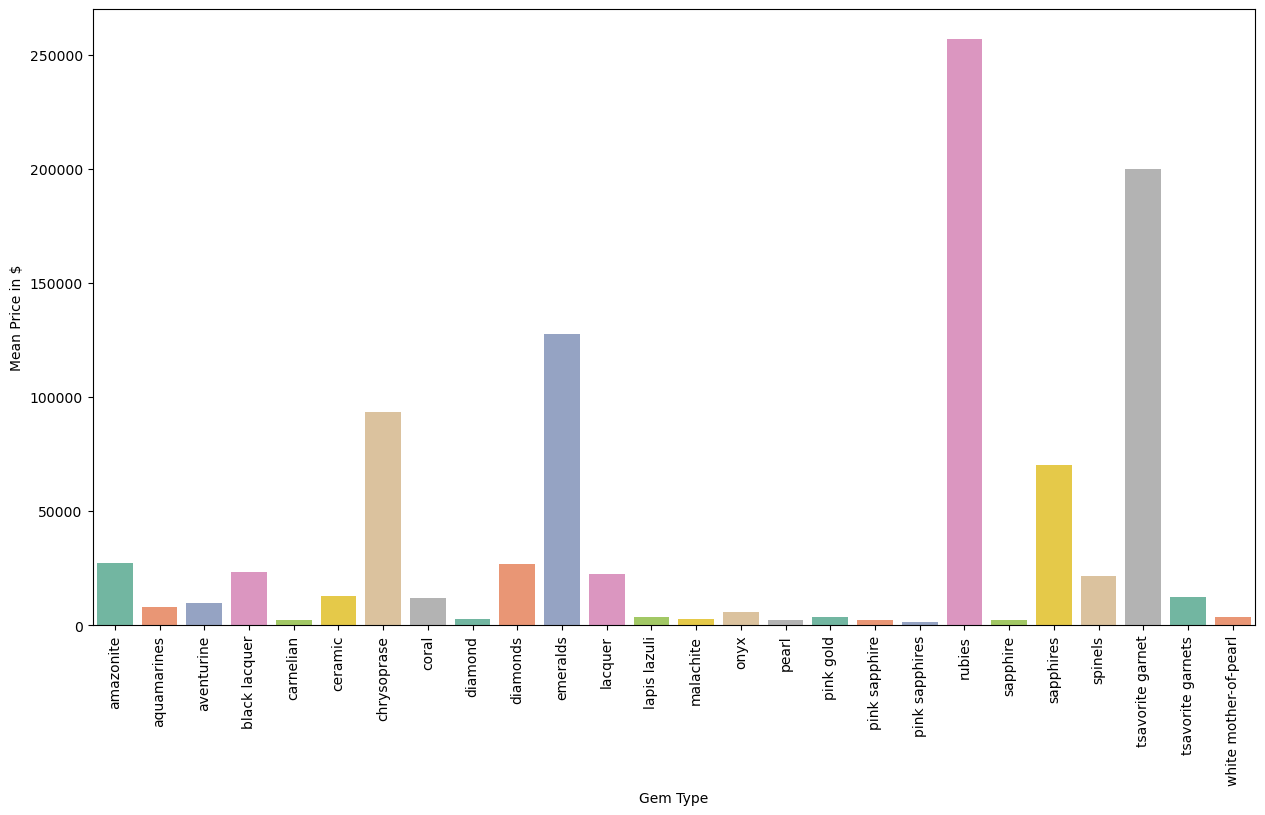

In [19]:
plt.figure(figsize=(15, 8))
sns.barplot(x= 'gem' , y = 'price', data=cartier_gp2_gem ,  palette = sns.color_palette("Set2"))
plt.xlabel('Gem Type')
plt.ylabel('Mean Price in $')
plt.xticks(rotation=90)
plt.show()

**Observation :** This plot shows us the mean price of products with gems on them
As we could have predicted products that have Rubies on them are the most expensive jewelry in Cartier products. the next ranks belong to Tsavorite garnets, Emeralds, and the Chrysoprase. The middle gems on the above figure are equal in mean price 

In [20]:
df = pd.read_csv('./DataSets/cartier_catalog.csv')
df.head()

,ref,categorie,title,price,tags,description,image
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png
2,B4084800,rings,Love ring,1650.0,pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png
3,B4084700,rings,Love ring,1770.0,white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png
4,B4085000,rings,Love wedding band,1070.0,yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png


**Imposing Label Encoder**

In [21]:
# Converting strings columns into integar

from sklearn.preprocessing import LabelEncoder

categorie = LabelEncoder()
title     = LabelEncoder()
tags      = LabelEncoder()

df['categorie'] = categorie.fit_transform( df['categorie'] )
df['title']     = title.fit_transform( df['title'] )
df['tags']      = tags.fit_transform( df['tags'] )

df

,ref,categorie,title,price,tags,description,image
0,B4084600,3,107,1650.0,71,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png
1,B4084900,3,107,3650.0,30,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png
2,B4084800,3,107,1650.0,1,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png
3,B4084700,3,107,1770.0,39,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png
4,B4085000,3,115,1070.0,71,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png
...,...,...,...,...,...,...,...
687,B8301416,1,31,7500.0,1,"Clash de Cartier earrings, small model, 18K pi...",/content/dam/rcq/car/19/15/81/7/1915817.png
688,B8301415,1,31,3900.0,1,"Clash de Cartier earrings, small model, 18K pi...",/content/dam/rcq/car/19/15/81/5/1915815.png
689,N8515173,1,30,13700.0,9,"Clash de Cartier earrings, 18K pink gold, each...",/content/dam/rcq/car/18/12/45/3/1812453.png
690,N8515218,1,29,13700.0,2,"Clash de Cartier earring, large model, 18K pin...",/content/dam/rcq/car/20/35/93/8/2035938.png


In [22]:
# dropping unnecessary columns
df.drop(['ref', 'description', 'image' ],axis=1, inplace=True)
df

,categorie,title,price,tags
0,3,107,1650.0,71
1,3,107,3650.0,30
2,3,107,1650.0,1
3,3,107,1770.0,39
4,3,115,1070.0,71
...,...,...,...,...
687,1,31,7500.0,1
688,1,31,3900.0,1
689,1,30,13700.0,9
690,1,29,13700.0,2


In [23]:
df.isna().sum()

categorie    0
title        0
price        0
tags         0
dtype: int64

In [24]:
# value_bar = df['categorie_n'].value_counts()
# value_bar

In [25]:
# plt.figure(figsize=(5,3))
# plt.bar(x = [' Label 3','Label 0','Label 2','Label 1'], height = value_bar, color = 'orange')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   categorie  692 non-null    int32  
 1   title      692 non-null    int32  
 2   price      692 non-null    float64
 3   tags       692 non-null    int32  
dtypes: float64(1), int32(3)
memory usage: 13.6 KB


In [27]:
df.head()

,categorie,title,price,tags
0,3,107,1650.0,71
1,3,107,3650.0,30
2,3,107,1650.0,1
3,3,107,1770.0,39
4,3,115,1070.0,71


In [28]:
# Assign trainers and targets
x = df.drop('categorie', axis = 1)
y = df['categorie']

# Splitting the data into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

x_train.shape , x_test.shape

((553, 3), (139, 3))

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Models, Scores = [],[]

### Decision Tree Classifier Algorithm

In [31]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)


Models.append('Decision Tree Classifier')
Scores.append(dt.score(x_test,y_test))

### XGBoost classifier

In [32]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train,y_train)

Models.append('XGBoost classifier')
Scores.append(xg.score(x_test,y_test))

### Random Forest Classifier Algorithm

In [33]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

Models.append('Random Forest Classifier')
Scores.append(rfc.score(x_test,y_test))

### Logistic Regression 

In [34]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(x_train,y_train)

Models.append('Logistic Regression ')
Scores.append(logreg.score(x_test,y_test))

### K-Nearest Neighbours Algorithm

In [35]:
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) 
knn.fit(x_train,y_train)

Models.append('KNN')
Scores.append(knn.score(x_test,y_test))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Gausian NB Algorithm

In [36]:
NB = GaussianNB()
NB.fit(x_train,y_train)

Models.append('Gausian NB')
Scores.append(NB.score(x_test,y_test))

### Support Vector Machine Algorithm

In [37]:
svm = SVC()
svm.fit(x_train,y_train)

Models.append('CVM')
Scores.append(svm.score(x_test,y_test))

In [38]:
result = pd.DataFrame({'Models':Models,
                       'Scores':Scores 
})
result

,Models,Scores
0,Decision Tree Classifier,0.841727
1,XGBoost classifier,0.899281
2,Random Forest Classifier,0.676259
3,Logistic Regression,0.402878
4,KNN,0.460432
5,Gausian NB,0.388489
6,CVM,0.424460


**As Decision Tree Classifier Classifier is having the highest accuracy let's find out the classification report for it**

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = dt.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n',cm)

Confusion Matrix
 [[28  0  0  1]
 [ 4 13  2  2]
 [ 1  3 32  3]
 [ 3  2  1 44]]


**Confusion Matrix using Heat Map**

Text(58.222222222222214, 0.5, 'truth')

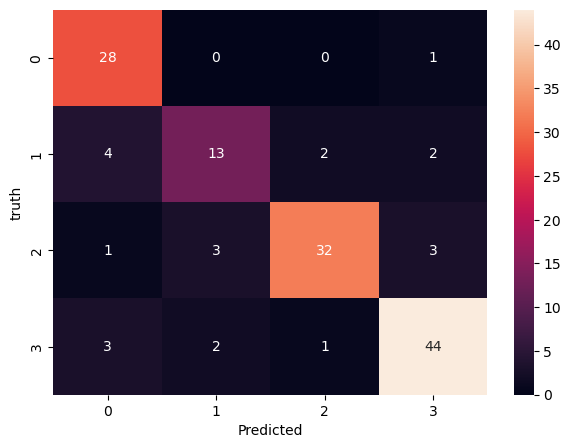

In [40]:
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('truth')

**Classification Report**

In [41]:
print(classification_report(y_test, y_pred, target_names=['class 0','class 1','class 2','class 3']))

              precision    recall  f1-score   support

     class 0       0.78      0.97      0.86        29
     class 1       0.72      0.62      0.67        21
     class 2       0.91      0.82      0.86        39
     class 3       0.88      0.88      0.88        50

    accuracy                           0.84       139
   macro avg       0.82      0.82      0.82       139
weighted avg       0.84      0.84      0.84       139

